# seaborn exercises

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import pydataset as py

Use the iris database

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


What does the distribution of petal lengths look like?

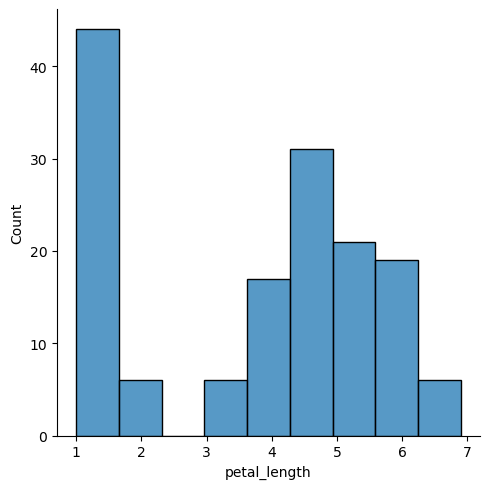

In [4]:
sns.displot(df['petal_length'])
plt.show()

Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

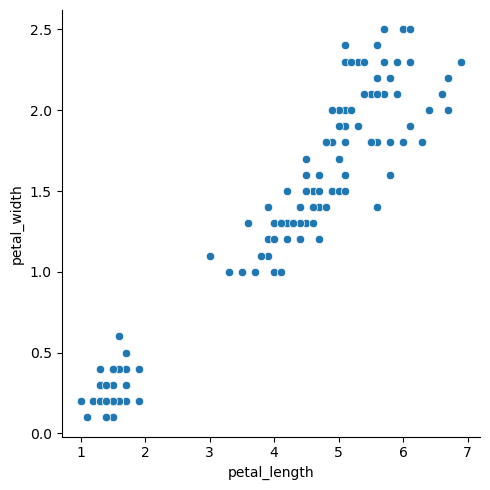

In [29]:
sns.relplot(data=df,
           x='petal_length',
           y='petal_width',
           kind='scatter')
plt.show()

Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

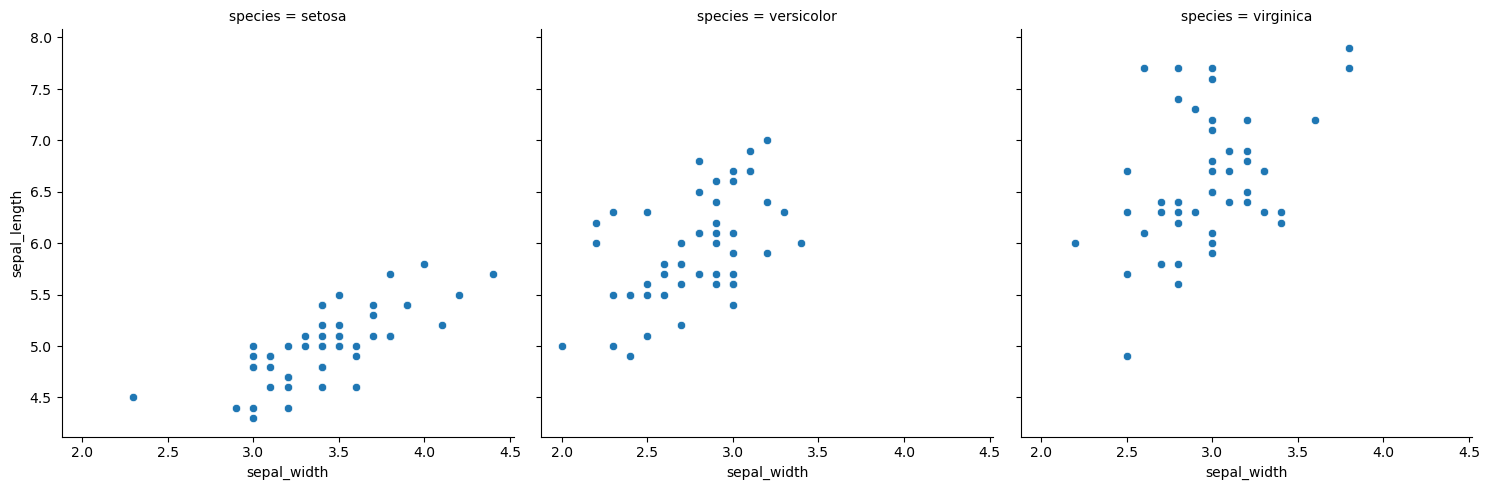

In [5]:
sns.relplot(data=df,
           x='sepal_width',
           y='sepal_length',
           col='species',
           kind='scatter')
plt.show()

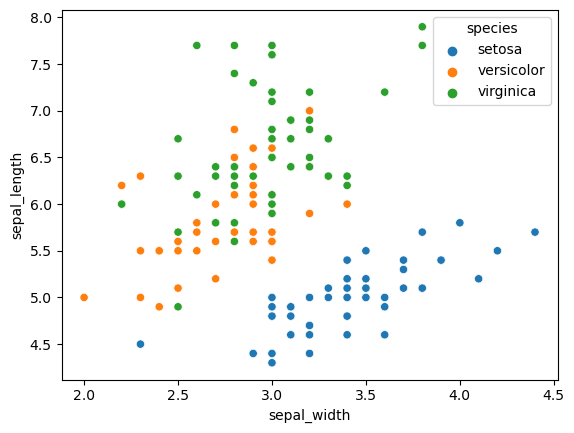

In [9]:
# viewing the 
sns.scatterplot(
data=df,
x='sepal_width',
y='sepal_length',
hue='species')
plt.show()

Which features would be best used to predict species?

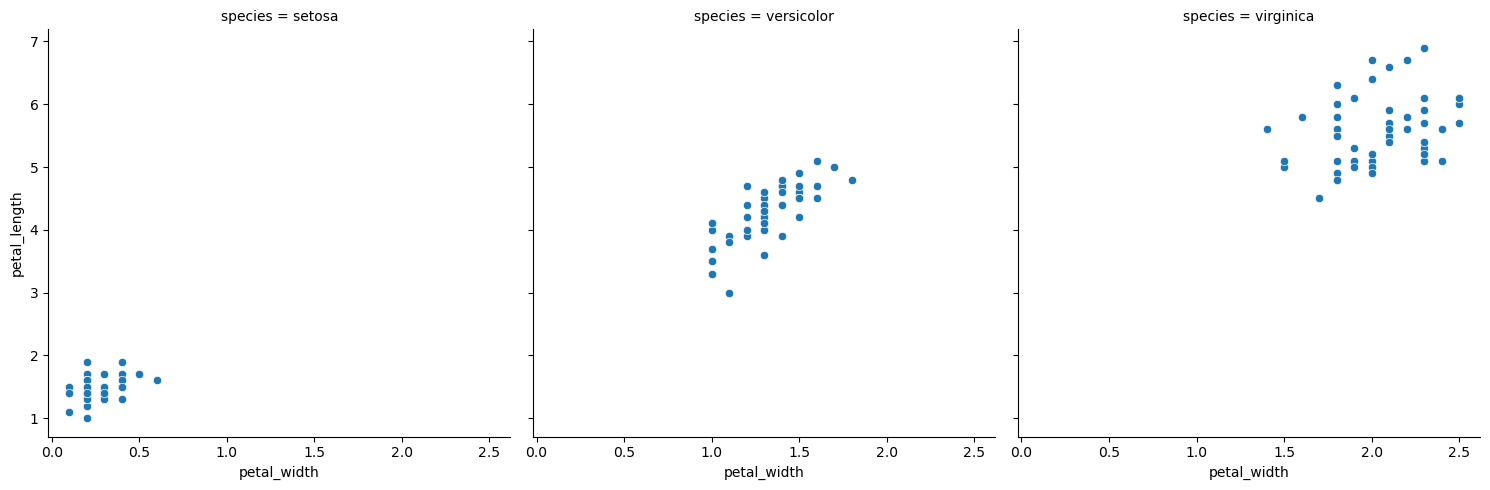

In [35]:
# looking at scatter plots for the petal information to compare to the sepal information
sns.relplot(data=df,
           x='petal_width',
           y='petal_length',
           col='species',
           kind='scatter')
plt.show()

Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [10]:
# load data to df2
df2 = sns.load_dataset('anscombe')
# check df2
df2.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [40]:
# grouping df2 by dataset and getting summary stats
df2.groupby('dataset').describe()

# I notice all the x are the same and the y have differemt metrics

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

> Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

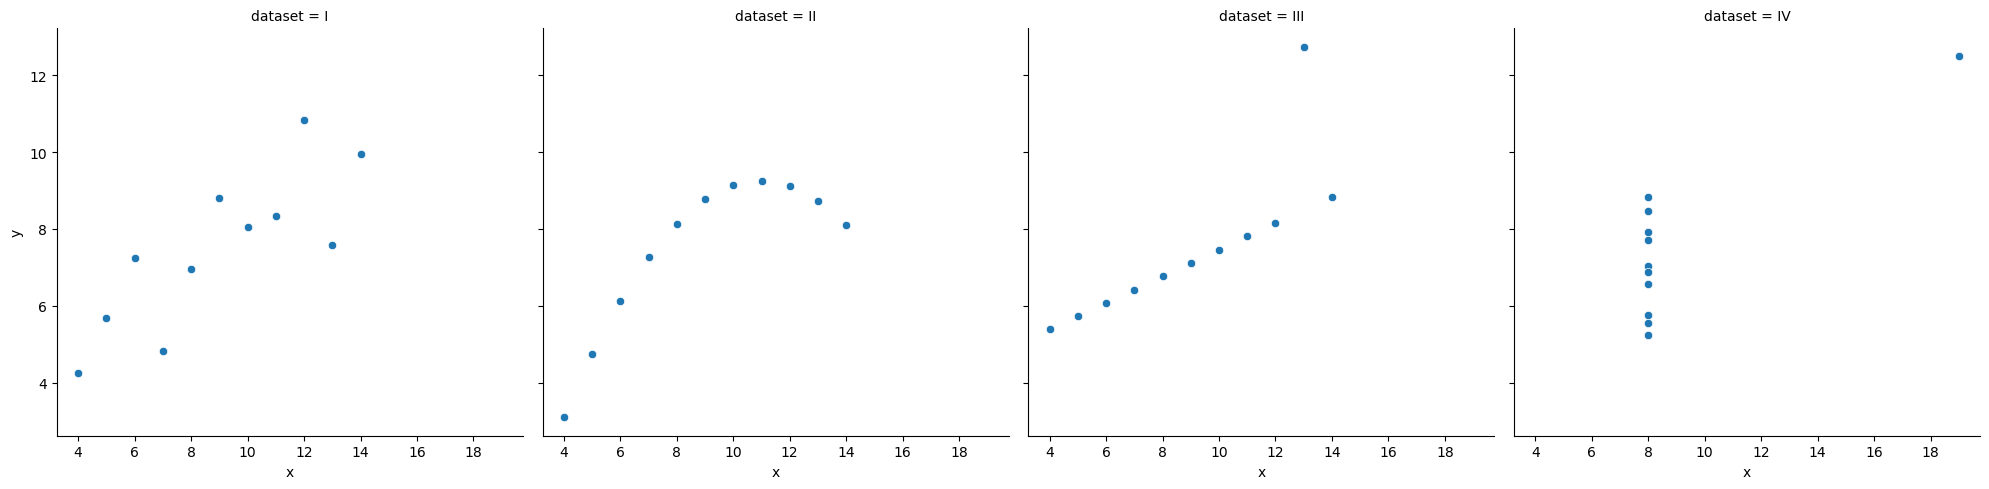

In [44]:
sns.relplot(data=df2,
           x='x',
           y='y',
           col='dataset')
plt.show()

Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [46]:
# view documentation from df
py.data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [52]:
# loading dataset into a df
df3 = py.data('InsectSprays')

# checking some of the data
df3.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


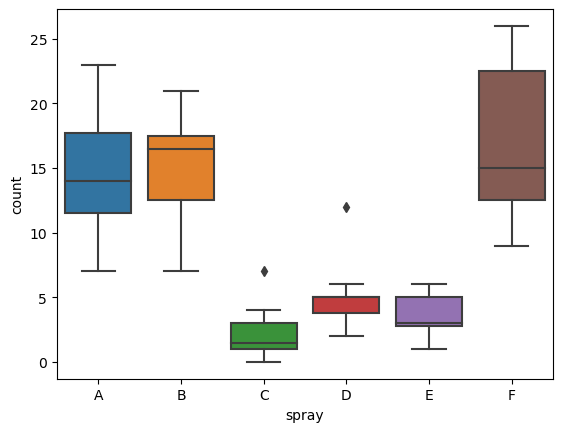

In [55]:
# creating a boxplot
# I place the categorical variable in x
# I placed the numeric variable in y
sns.boxplot(data=df3,
           x = 'spray',
           y='count')
plt.show()

Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [11]:
# looking at swiss documentation
# py.data('swiss', show_doc=True)

# loading data into df
df4 = py.data('swiss')

# preview data
df4.head()

# looking at indexes
df4.index

# looking at the data types
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


> Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [12]:
# checking the breakup of the catholic values
df4.Catholic.value_counts(bins=4)

# creating the standard for catholic and assigning it to new column
# df4['is_catholic'] = df4.Catholic >= 51

df4.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


> Does whether or not a province is Catholic influence fertility?

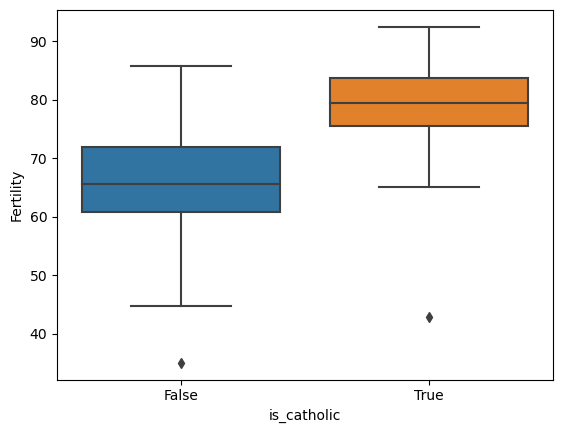

In [75]:
# using a box plot to examine the fertility and the catholicism 
sns.boxplot(data=df4,
           x='is_catholic',
           y='Fertility')
plt.show()

# there is a pattern of catholics being more fertile based on this boxplot

> What measure correlates most strongly with fertility?

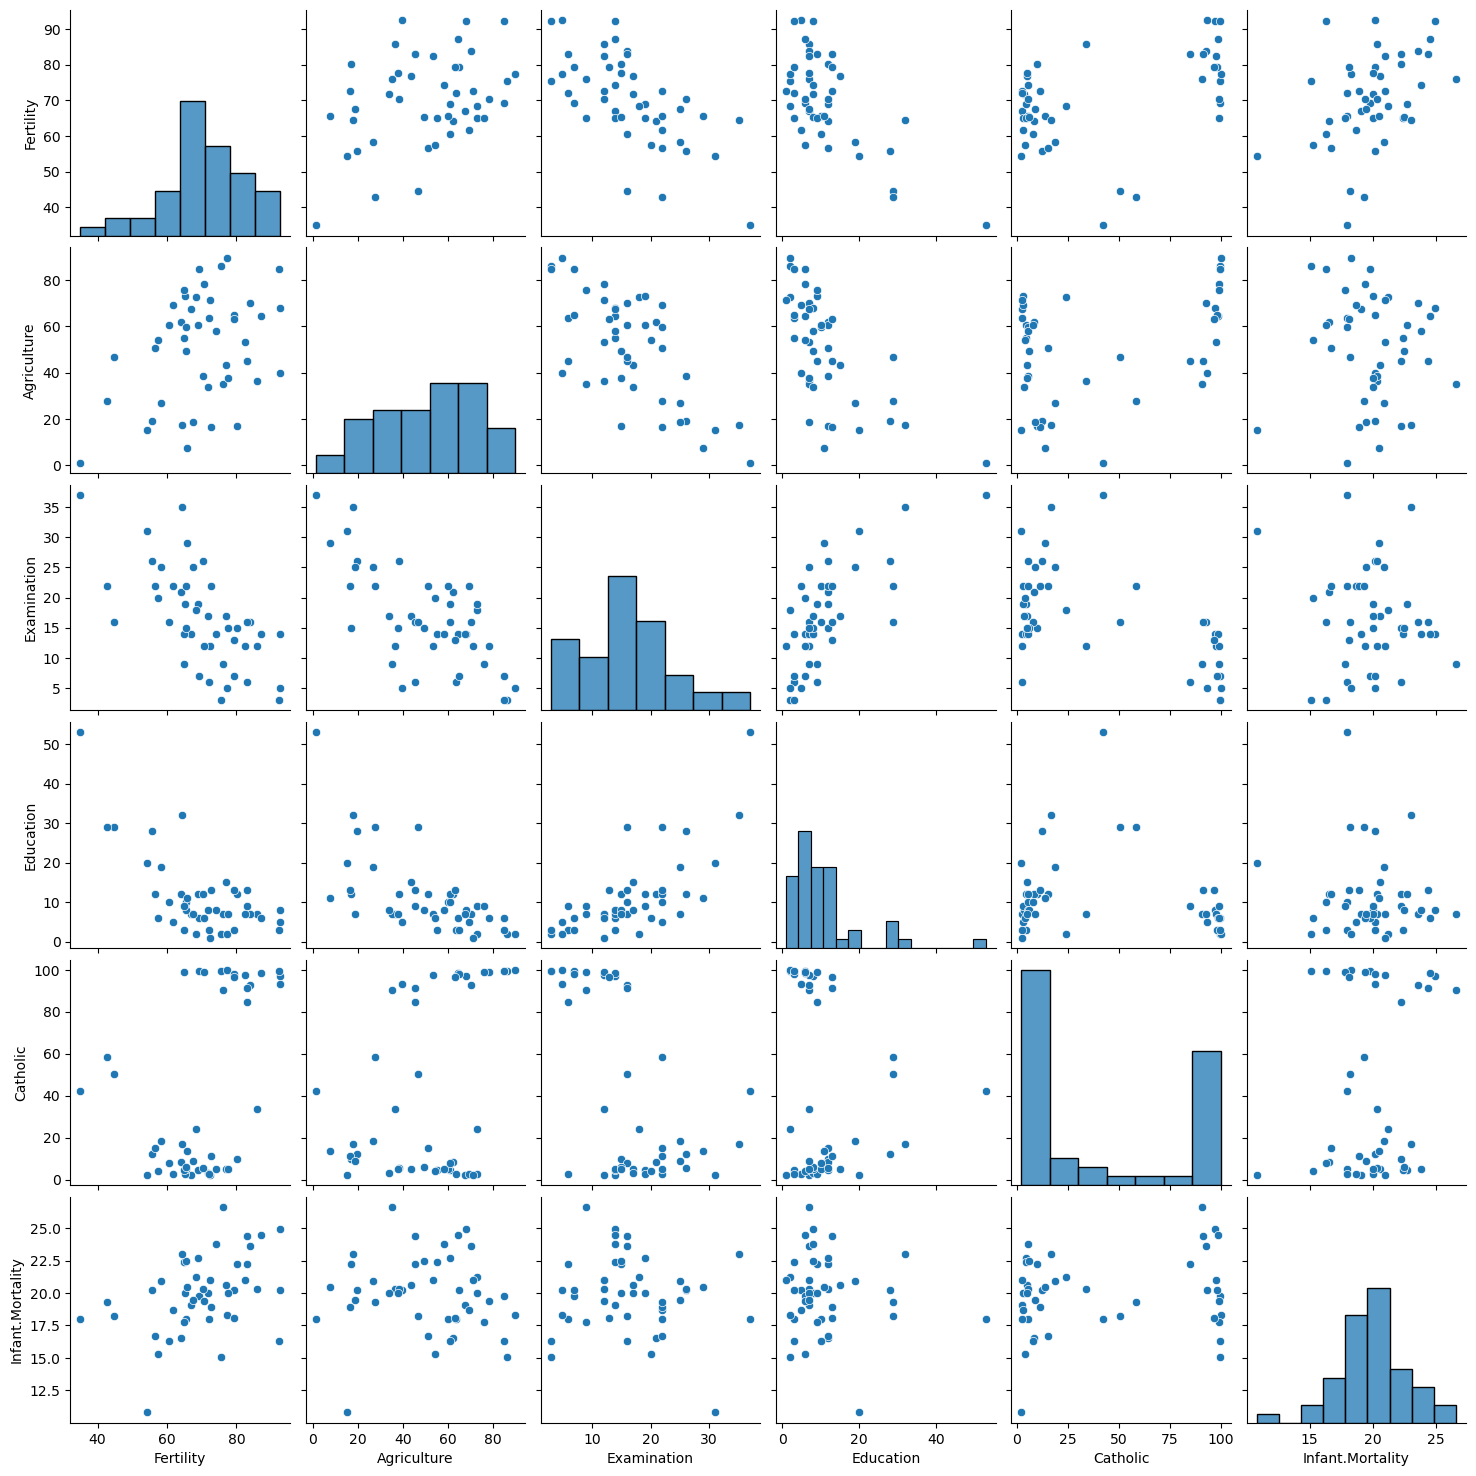

In [16]:
# there is a strong negative correlation with fertility and Examination and education
sns.pairplot(data = df4)
plt.show()

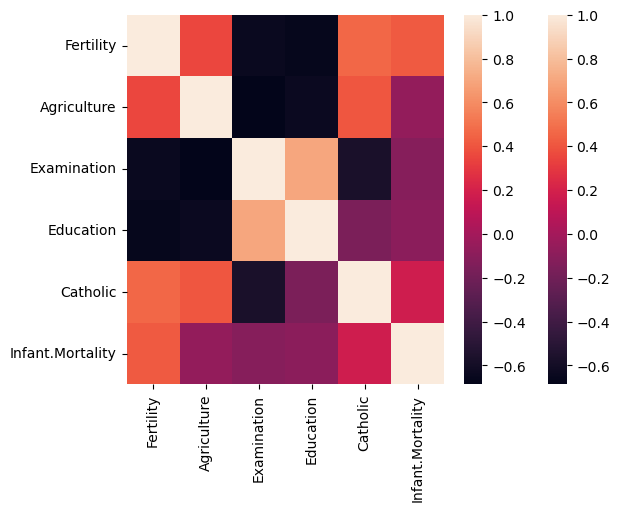

In [18]:
sns.heatmap(df4.corr())
plt.show()

Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [20]:
# importing env file for accessing data
import env

In [21]:
# querying sql and assinging results to chip
chip = pd.read_sql('SELECT * FROM orders;', env.get_db_url('chipotle'))

# viewing the data
chip.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [22]:
# finding 4 most popular items
chip.item_name.value_counts().head(4)

# creaing a mask with the 4 items and assigning the new df to variable
most_popular = chip[chip.item_name.isin(chip.item_name.value_counts().head(4).index)]
most_popular.head()

,id,order_id,quantity,item_name,choice_description,item_price
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
10,11,5,1,Chips and Guacamole,nan,$4.45


In [23]:
# changing the dtype of the prices
most_popular.loc[:,'item_price'] = most_popular.item_price.str.strip('$').astype(float)
most_popular.dtypes

/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_3201/2942131446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_popular.loc[:,'item_price'] = most_popular.item_price.str.strip('$').astype(float)


id                      int64
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [24]:
# summing the top4 items  to get total revenue and top4 items
popular_revenue = most_popular[['item_name', 'item_price']].groupby('item_name').sum().reset_index()

popular_revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Chips and Guacamole,2201.04
3,Steak Burrito,3851.43


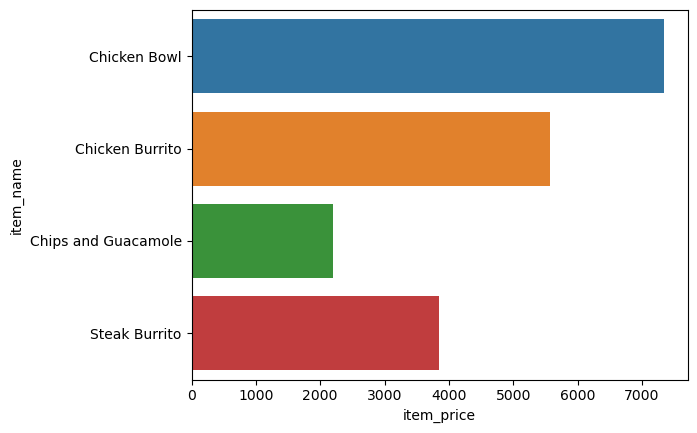

In [27]:
sns.barplot(data=popular_revenue,
            y = 'item_name',
            x='item_price')
plt.show()

Load the sleepstudy data and read it's documentation.

In [29]:
sleep = py.data('sleepstudy')
py.data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [129]:
# viewing data for clarity
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


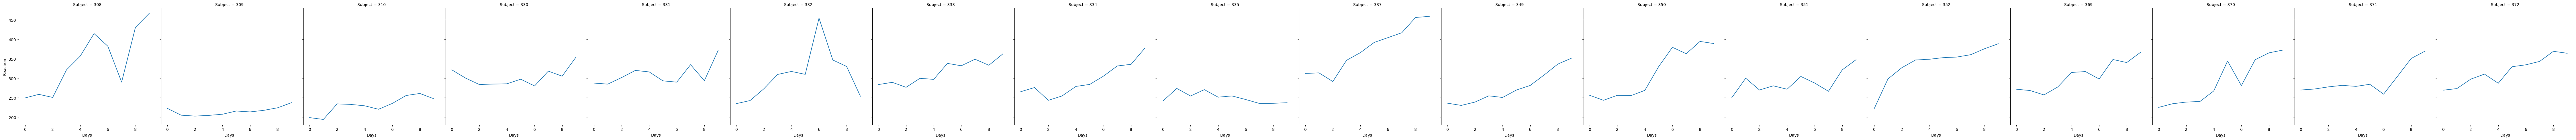

In [30]:
# line plots for each subject showing their change in reaction time over the duration from the dataset
sns.relplot(data=sleep,
           x='Days',
           y='Reaction',
           col='Subject',
           kind='line')
plt.show()

In [215]:
# finding the average change in reaction time over the duration
overall_avg = sleep.groupby('Days').mean()['Reaction']



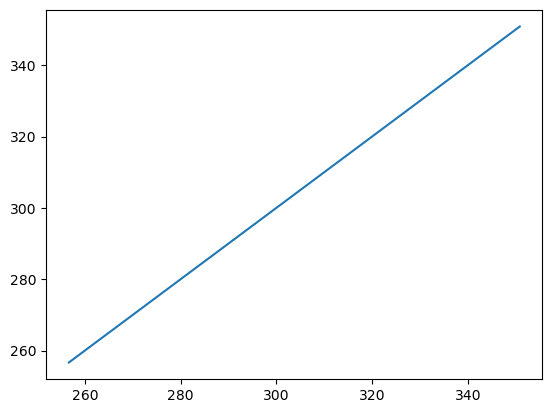

In [31]:
plt.plot(sleep.groupby('Days').mean()['Reaction'],sleep.groupby('Days').mean()['Reaction'])
plt.show()

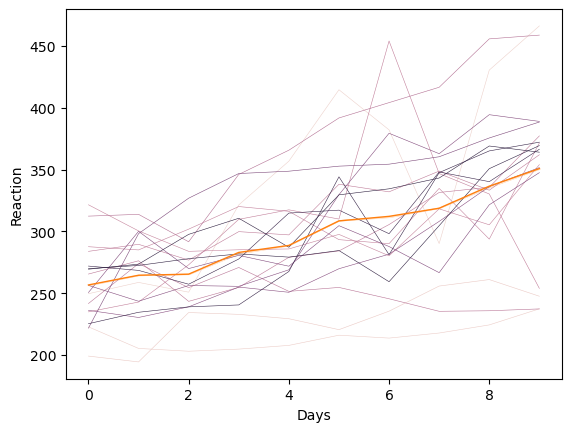

In [36]:
sns.lineplot(data=sleep, x='Days', y='Reaction', hue='subject', legend=False, linewidth=.4)
# sns.lineplot(data=overall_avg, linewidth=2)
sns.lineplot(data=sleep, x='Days', y='Reaction', legend=False, ci=False, linewidth=1)
plt.show()

# sleep.groupby('Reaction').mean()